### Финальное задание по курсу Python и математика для анализа данных

In [1]:
# Загрузим все необходимые библиотеки
import pandas as pd
import seaborn as sns

#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 12,9
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
# задание 1 - загрузить файл для работы
data = pd.read_csv('HR.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Пояснения к колонкам:
* satisfaction_level - уровень удовлетворенности работой
* last_evaluation - уровень последней оценки работы
* number_project -количество проектов
* average_montly_hours - среднее количество часов в месяц работы
* time_spend_company - шкала от 2 до 10, отражающее время работы в компании
* Work_accident - наличие инцидента на рабочем месте
* left - ушел ли работник или нет
* promotion_last_5years - факт повышения в течение 5 лет
* sales - департамент работника
* salary - уровень зарплаты

In [3]:
# проверим данные на отсутствие пропусков и типы данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [4]:
numerical = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']

In [5]:
# задание 2 - Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
# посмотреть на данные по зарплате
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

In [7]:
# посмотреть на данные по департаментам
data['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

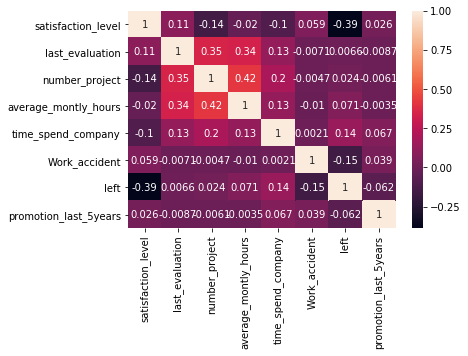

In [8]:
# задание 3 - Рассчитать и визуализировать корреляционную матрицу для переменных
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True);

На следующие зависимости стоит обратить внимание:
- satisfaction_level - left
- work_accident - left
- last_evaluation - number_project
- last_evaluation - average_monthly_hours
- number_project - average_monthly_hours

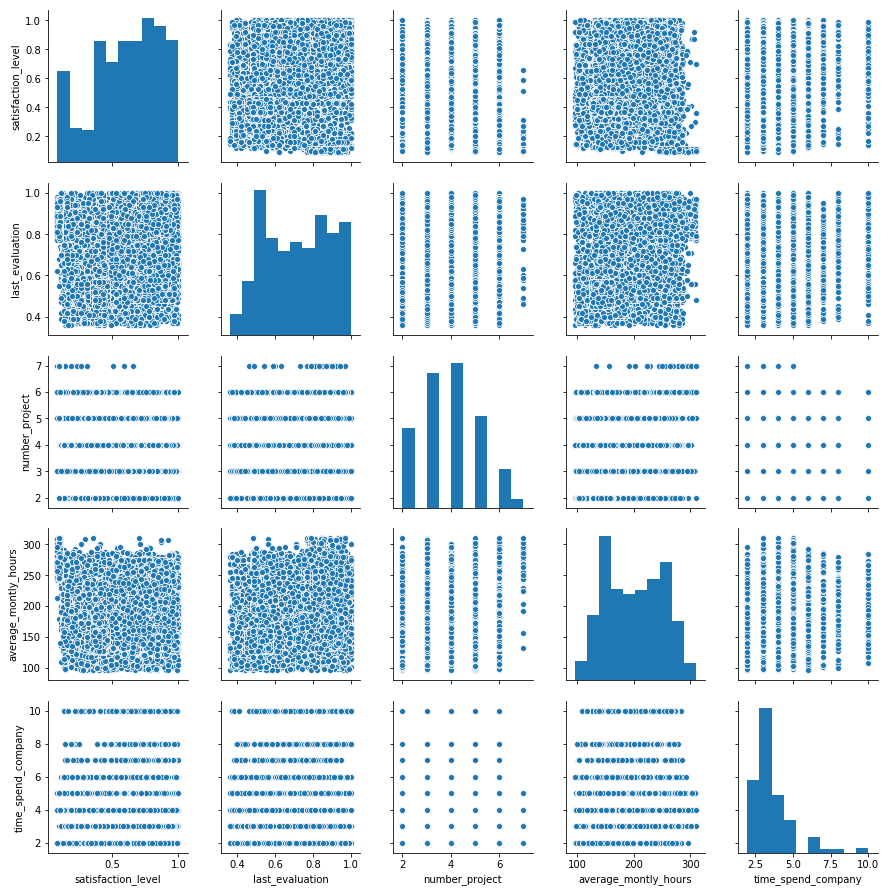

In [9]:
# задание 4 - Визуализировать несколько взаимосвязей между переменными
# посмотрим все данные
sns.pairplot(data[numerical]);

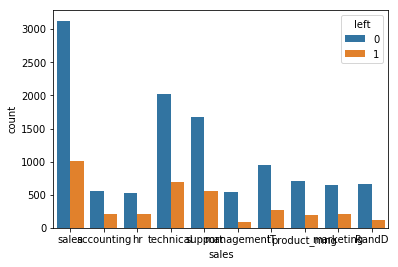

In [10]:
# посмотрим зависимость увольнения из компании от департамента
sns.countplot(x='sales', hue='left', data=data);

In [11]:
# задание 5 - С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [12]:
# задание 6 - Рассчитать сколько работников работает в каждом департаменте
# важно учесть только оставшихся людей и не учитывать уволившихся
print('Чистые цифры')
print(data['sales'][data['left'] == 0].value_counts())
print('Нормализованные цифры')
print(data['sales'][data['left'] == 0].value_counts(normalize=True))

Чистые цифры
sales          3126
technical      2023
support        1674
IT              954
product_mng     704
RandD           666
marketing       655
accounting      563
management      539
hr              524
Name: sales, dtype: int64
Нормализованные цифры
sales          0.273539
technical      0.177021
support        0.146482
IT             0.083479
product_mng    0.061603
RandD          0.058278
marketing      0.057315
accounting     0.049265
management     0.047165
hr             0.045852
Name: sales, dtype: float64


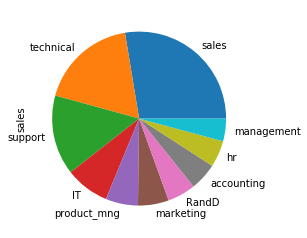

In [13]:
data['sales'].value_counts().plot(kind='pie');

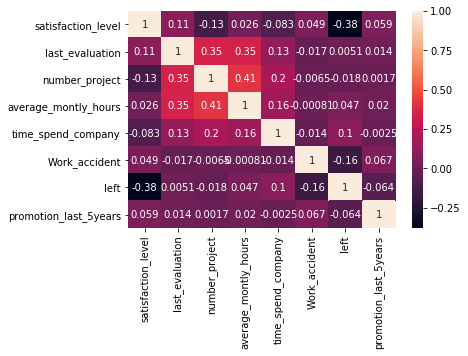

In [14]:
# из любопытства - посмотреть графики в разрезе департамента sales
corr_matrix = data[data['sales'] == 'sales'].corr()
sns.heatmap(corr_matrix, annot=True);

In [15]:
# задание 7 - Показать распределение сотрудников по зарплатам
print('Распределение сотрудников по зарплате')
print(data['salary'].value_counts())
print('Нормализованное распределение сотрудников по зарплате')
print(data['salary'].value_counts(normalize=True))

Распределение сотрудников по зарплате
low       7316
medium    6446
high      1237
Name: salary, dtype: int64
Нормализованное распределение сотрудников по зарплате
low       0.487766
medium    0.429762
high      0.082472
Name: salary, dtype: float64


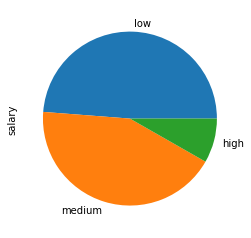

In [16]:
data['salary'].value_counts().plot(kind='pie');

In [17]:
# задание 8 - Показать распределение сотрудников по зарплатам совместно с департаментами
data_salary_dep = data[['sales', 'salary', 'satisfaction_level']].groupby(['sales', 'salary']).count()
data_salary_dep.columns = ['count']
data_salary_dep.head()

count
sales salary       
IT    high       83
      low       609
      medium    535
RandD high       51
      low       364

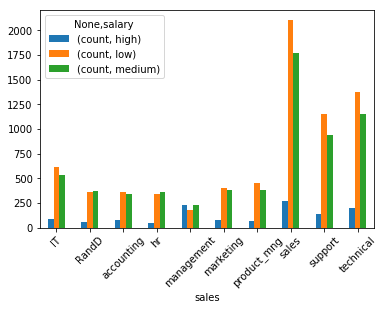

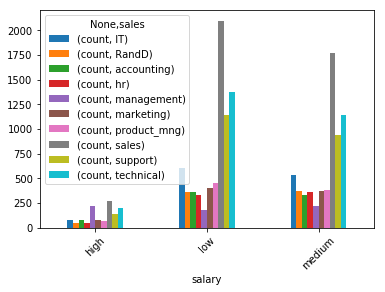

In [18]:
# строим графики
data_salary_dep.unstack('salary').plot(kind='bar', rot=45);
data_salary_dep.unstack('sales').plot(kind='bar', rot=45);

In [19]:
# задание 9 - Сколько сотрудников покинули компанию
print('Покинули ли компанию сотрудники')
print(data['left'].value_counts())
print('Покинули ли компанию сотрудники (в процентах)')
print(data['left'].value_counts(normalize=True))

Покинули ли компанию сотрудники
0    11428
1     3571
Name: left, dtype: int64
Покинули ли компанию сотрудники (в процентах)
0    0.761917
1    0.238083
Name: left, dtype: float64


In [20]:
# задание 10 - Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Первое, что бросается в глаза - это то, что повышений за последние 5 лет у уволившихся было значительно меньше 

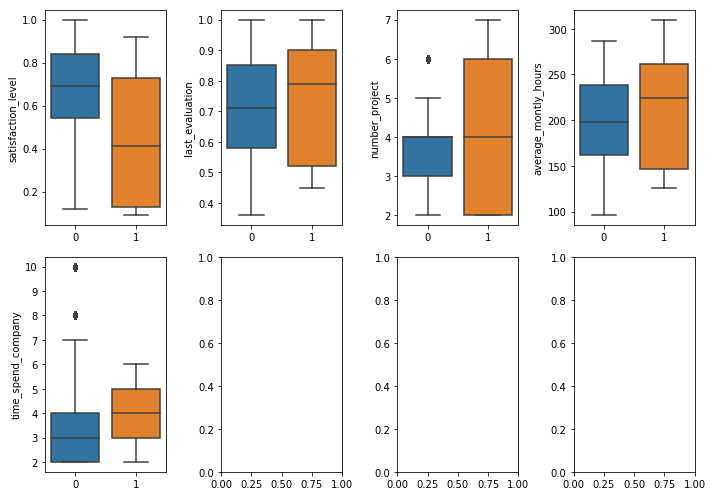

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='left', y=feat, data=data, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

Из приведенных выше графиков можно сделать следующие выводы про покинувших компанию людей:
* Уровень удовлетворенности ниже
* Удивительно, но последняя оценка в среднем была выше
* Количество проектов существенно выше, как и среднее количество рабочих часов
* В среднем время работали на компанию дольше